Training K-Nearest Neighbors...
KNN Accuracy: 0.85275
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1202
           1       0.99      0.97      0.98      1219
           2       0.73      0.82      0.77      1205
           3       0.88      0.87      0.88      1184
           4       0.77      0.76      0.77      1202
           5       1.00      0.81      0.90      1211
           6       0.68      0.56      0.61      1218
           7       0.87      0.95      0.91      1159
           8       0.97      0.94      0.96      1197
           9       0.89      0.97      0.93      1203

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



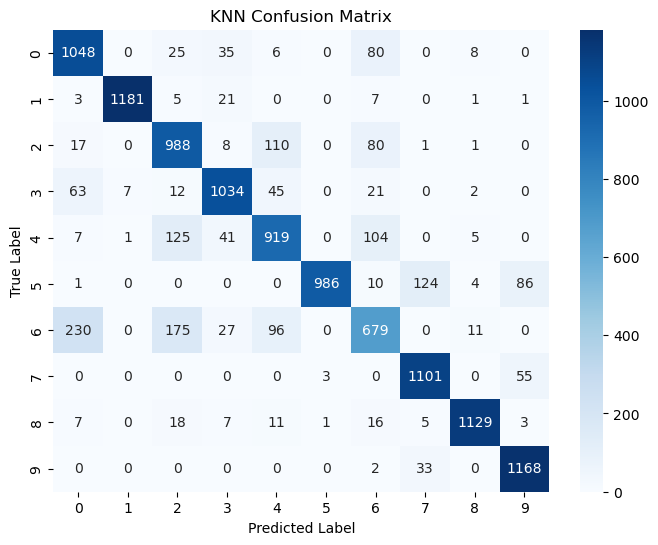


Training Decision Tree...
Decision Tree Accuracy: 0.80575
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1202
           1       0.97      0.93      0.95      1219
           2       0.72      0.67      0.69      1205
           3       0.78      0.80      0.79      1184
           4       0.62      0.78      0.69      1202
           5       0.92      0.88      0.90      1211
           6       0.58      0.51      0.54      1218
           7       0.86      0.91      0.89      1159
           8       0.93      0.92      0.93      1197
           9       0.92      0.89      0.90      1203

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



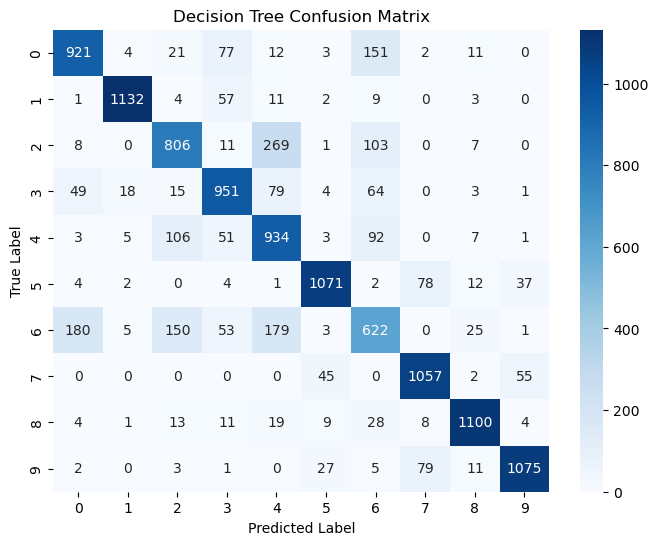


Training Support Vector Machine...
SVM Accuracy: 0.85375
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      1202
           1       0.97      0.97      0.97      1219
           2       0.76      0.78      0.77      1205
           3       0.84      0.88      0.86      1184
           4       0.77      0.79      0.78      1202
           5       0.93      0.95      0.94      1211
           6       0.67      0.58      0.62      1218
           7       0.92      0.92      0.92      1159
           8       0.96      0.91      0.94      1197
           9       0.95      0.95      0.95      1203

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



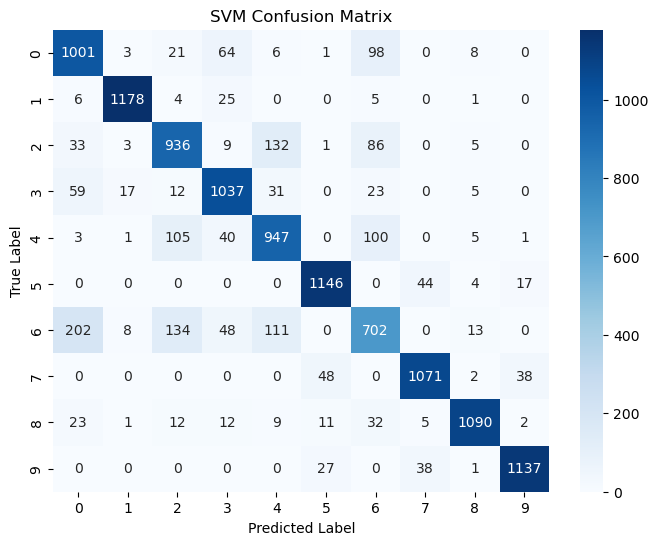

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images for basic machine learning algorithms
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # 2D to 1D array
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to range 0-1
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Split the data further into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=42
)

# K-Nearest Neighbors (KNN)
print("Training K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_split, y_train_split)
knn_pred = knn.predict(x_val_split)
print("KNN Accuracy:", accuracy_score(y_val_split, knn_pred))
print("KNN Classification Report:\n", classification_report(y_val_split, knn_pred))

# Plot confusion matrix for KNN
knn_cm = confusion_matrix(y_val_split, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree (DT)
print("\nTraining Decision Tree...")
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(x_train_split, y_train_split)
dt_pred = dt.predict(x_val_split)
print("Decision Tree Accuracy:", accuracy_score(y_val_split, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_val_split, dt_pred))

# Plot confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_val_split, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine (SVM)
print("\nTraining Support Vector Machine...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_split, y_train_split)
svm_pred = svm.predict(x_val_split)
print("SVM Accuracy:", accuracy_score(y_val_split, svm_pred))
print("SVM Classification Report:\n", classification_report(y_val_split, svm_pred))

# Plot confusion matrix for SVM
svm_cm = confusion_matrix(y_val_split, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
